In [ ]:
#Entscheidung welche Merkmalsvariablen für die Aufgabe relevant sind
#Prinzipiell von Vorteil Merkmalsvariablen auf ein Minimum zu reduzieren
#FDR

In [108]:
import pandas as pd
from sklearn.linear_model import Lasso

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Überprüfen der Daten
print(data.head())

# Features und Zielwert definieren
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year']
target = 'calls'

# Extrahieren der Daten
X = data[features]
y = data[target]

# Lasso-Regression mit L1-Regularisierung
lasso = Lasso(alpha=50)
lasso.fit(X, y)

# Anzeigen der Koeffizienten
print("Koeffizienten:", lasso.coef_)

# Anzeigen der ausgewählten Merkmale
selected_features = [feature for feature, coef in zip(features, lasso.coef_) if coef != 0]
print("Ausgewählte Merkmale:", selected_features)

# Optional: Speichern der ausgewählten Merkmale in eine separate CSV-Datei
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features_calls'])
selected_features_df.to_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/selected_features.csv', index=False)


         date  Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0  2016-04-01           0      73   8154    1700     90      8154    8154   
1  2016-04-02           1      64   8526    1700     90      8526    8526   
2  2016-04-03           2      68   8088    1700     90      8088    8088   
3  2016-04-04           3      71   7044    1700     90      7044    7044   
4  2016-04-05           4      63   7236    1700     90      7236    7236   

   weekday  year  calendarweek  month  quarter  season  Feiertage  \
0        4  2016            13      4        2       1          0   
1        5  2016            13      4        2       1          0   
2        6  2016            13      4        2       1          0   
3        0  2016            14      4        2       1          0   
4        1  2016            14      4        2       1          0   

   schulferien  Sick-ratio  Residuals_calls  Residuals_Sick-ratio  \
0            1    0.042941              NaN          

In [94]:
import pandas as pd
from sklearn.linear_model import Lasso

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Überprüfen der Daten
print(data.head())

# Features und Zielwert definieren
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year']
target = 'Sick-ratio'

# Extrahieren der Daten
X = data[features]
y = data[target]

# Lasso-Regression mit L1-Regularisierung
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Anzeigen der Koeffizienten
print("Koeffizienten:", lasso.coef_)

# Anzeigen der ausgewählten Merkmale
selected_features = [feature for feature, coef in zip(features, lasso.coef_) if coef != 0]
print("Ausgewählte Merkmale:", selected_features)

# Optional: Speichern der ausgewählten Merkmale in eine separate CSV-Datei
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features_Sick-ratio'])
selected_features_df.to_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/selected_features.csv', index=False)


         date  Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0  2016-04-01           0      73   8154    1700     90      8154    8154   
1  2016-04-02           1      64   8526    1700     90      8526    8526   
2  2016-04-03           2      68   8088    1700     90      8088    8088   
3  2016-04-04           3      71   7044    1700     90      7044    7044   
4  2016-04-05           4      63   7236    1700     90      7236    7236   

   weekday  year  calendarweek  month  quarter  season  Feiertage  \
0        4  2016            13      4        2       1          0   
1        5  2016            13      4        2       1          0   
2        6  2016            13      4        2       1          0   
3        0  2016            14      4        2       1          0   
4        1  2016            14      4        2       1          0   

   schulferien  Sick-ratio  Residuals_calls  Residuals_Sick-ratio  \
0            1    0.042941              NaN          

In [106]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Features und Zielwert definieren
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year']
target = 'calls'

# Extrahieren der Daten
X = data[features]
y = data[target]

# Definieren der Parameter für Grid-Search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]  # Eine Auswahl an alpha-Werten
}

# Erstellen eines Lasso-Modells
lasso = Lasso(max_iter=10000)

# Grid-Search mit Kreuzvalidierung
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

# Bestes alpha und das beste Modell anzeigen
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

print(f"Bestes alpha: {best_alpha}")
print(f"Beste Koeffizienten: {best_model.coef_}")

# Optional: Modellbewertung
y_pred = best_model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error des besten Modells: {mse}")


Bestes alpha: 50
Beste Koeffizienten: [-137.5209483     9.67394945  -51.20570924  164.24044125   -0.
    0.          343.06561696  317.43879252]
Mean Squared Error des besten Modells: 1135914.7060790258


In [98]:
import pandas as pd

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Berechnen der Standardabweichung für die Spalte 'Sick-ratio'
standardabweichung = data['Sick-ratio'].std()
Mittelwert = data['Sick-ratio'].mean()

print(f"Standardabweichung der Spalte 'Sick-ratio': {standardabweichung}")
print(f"Mittelwert der Spalte 'Sick-ratio': {Mittelwert}")

Standardabweichung der Spalte 'Sick-ratio': 0.0069766225414203764
Mittelwert der Spalte 'Sick-ratio': 0.036174691518498336


Feature Wichtigkeit:
        Feature  Importance
2  calendarweek    0.414239
0       weekday    0.231279
6        season    0.128108
7          year    0.107788
3         month    0.067945
1   schulferien    0.026308
4       quarter    0.016008
5     Feiertage    0.008324


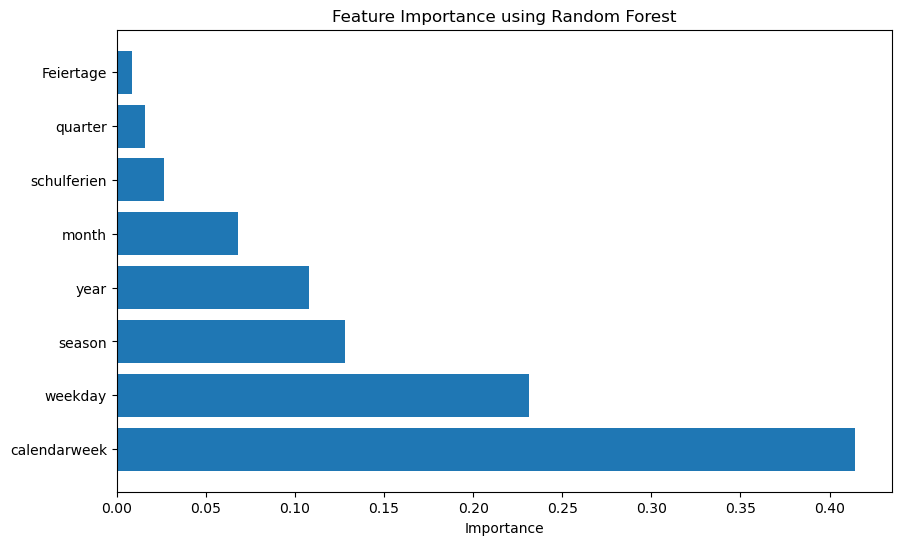

In [102]:
# Merkmalsauswahl mit Random Forest für calls
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Features und Zielwert definieren
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year']
target = 'calls'

# Extrahieren der Daten
X = data[features]
y = data[target]

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen und Trainieren des Random-Forest-Modells
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Berechnen der Feature-Wichtigkeit
importances = rf.feature_importances_

# Erstellen eines DataFrames zur Anzeige der Feature-Wichtigkeit
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Wichtigkeit:")
print(feature_importance_df)

# Visualisieren der Feature-Wichtigkeit
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.show()

Feature Wichtigkeit:
        Feature  Importance
2  calendarweek    0.447915
6        season    0.151173
7          year    0.137392
0       weekday    0.119021
3         month    0.100744
1   schulferien    0.019770
4       quarter    0.018276
5     Feiertage    0.005708


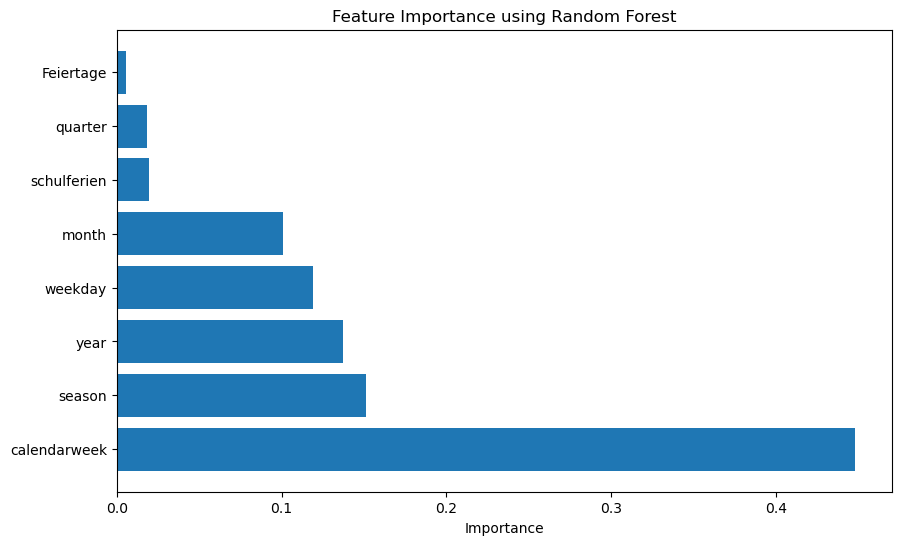

In [110]:
# Merkmalsauswahl mit Random Forest für calls
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Features und Zielwert definieren
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year']
target = 'Sick-ratio'

# Extrahieren der Daten
X = data[features]
y = data[target]

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen und Trainieren des Random-Forest-Modells
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Berechnen der Feature-Wichtigkeit
importances = rf.feature_importances_

# Erstellen eines DataFrames zur Anzeige der Feature-Wichtigkeit
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Wichtigkeit:")
print(feature_importance_df)

# Visualisieren der Feature-Wichtigkeit
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.show()